<img src="https://pbs.twimg.com/media/EWjp0c-XQAEqnNV?format=jpg&name=large">

In [1]:
# Ramanujan proved the above identity of pi
# Going to see how fast it converges

# initialize
initial_state = "3 + 1**2"

In [2]:
x = initial_state

In [3]:
"""
This implementation relies on parsing the string version of the equation.
It's a bit gross and OOMs around 46 levels deep.

The problem is that it compiles the string and then below I
evaluate it in one go, which for a sufficient amount of nesting 
causes an OOM; more scalable to compute iteratively and then return the 
final value.
"""

def get_final_term(eq): 
    return eq.rsplit(" ")[-1].replace(")","")

def increment(eq, n):
    """
    Starts with the initial equation and returns a Ramanujan 
    equation n levels deep.
    
    e.g. 3**2 --> (3**2 / (6 + 5**2)) would be 1 level deeper.
    """
    for x in range(n):
        last_term = get_final_term(eq)
        new = "(" + last_term + " / " + "(6 + " + str(eval(last_term.split("**")[0])+2) + "**2))"
        new_eq = eq.replace(last_term, new)
        eq = new_eq
    
    return eq

In [4]:
# this works until n = 46, then OOMs
pi_values = []
for i in range(1,47):
    pi_values.append(eval(increment(x,i)))

In [5]:
pi_values

[3.066666666666667,
 3.158974358974359,
 3.1352380952380954,
 3.1445605884630274,
 3.1399806022756844,
 3.1425620131502483,
 3.1409656223815516,
 3.142021107132669,
 3.141287132741557,
 3.1418180718490314,
 3.14142163385186,
 3.141725449633402,
 3.1414874944915123,
 3.14167733872275,
 3.1415234565674885,
 3.1416499190792724,
 3.1415447277143715,
 3.141633164706394,
 3.1415581036454996,
 3.141622356593885,
 3.1415669318690465,
 3.141615074779973,
 3.141572991649825,
 3.1416099910137154,
 3.141577288289547,
 3.1416063348426357,
 3.141580419038635,
 3.1416036384068993,
 3.1415827539476537,
 3.1416016064008514,
 3.141584530625638,
 3.1416000461694713,
 3.141585906396939,
 3.1415988283811638,
 3.1415869882461043,
 3.1415978640180477,
 3.1415878506498456,
 3.141597090445934,
 3.1415885465407083,
 3.141596462724349,
 3.1415891142407353,
 3.1415959480394657,
 3.141589581957841,
 3.1415955220520804,
 3.141589970767855,
 3.1415951664503057]

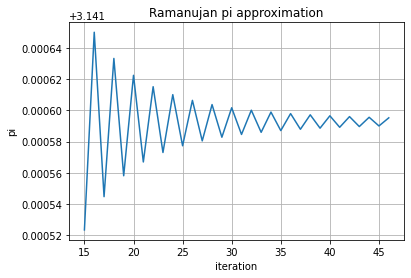

In [26]:
# See how it converges...

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Going deeper into the levels
y = pi_values[14:]
x = range(15,47)

fig, ax = plt.subplots()
ax.plot(x,y)

ax.set(xlabel='iteration', ylabel='pi',
       title='Ramanujan pi approximation')
ax.grid()

plt.show()

In [27]:
print(increment(initial_state,46))

3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + (7**2 / (6 + (9**2 / (6 + (11**2 / (6 + (13**2 / (6 + (15**2 / (6 + (17**2 / (6 + (19**2 / (6 + (21**2 / (6 + (23**2 / (6 + (25**2 / (6 + (27**2 / (6 + (29**2 / (6 + (31**2 / (6 + (33**2 / (6 + (35**2 / (6 + (37**2 / (6 + (39**2 / (6 + (41**2 / (6 + (43**2 / (6 + (45**2 / (6 + (47**2 / (6 + (49**2 / (6 + (51**2 / (6 + (53**2 / (6 + (55**2 / (6 + (57**2 / (6 + (59**2 / (6 + (61**2 / (6 + (63**2 / (6 + (65**2 / (6 + (67**2 / (6 + (69**2 / (6 + (71**2 / (6 + (73**2 / (6 + (75**2 / (6 + (77**2 / (6 + (79**2 / (6 + (81**2 / (6 + (83**2 / (6 + (85**2 / (6 + (87**2 / (6 + (89**2 / (6 + (91**2 / (6 + 93**2))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))


In [9]:
"""
Levels
======
1/ 3 + 1**2
2/ 3 + (1**2 / (6 + 3**2))
3/ 3 + (1**2 / (6 + (3**2 / (6 + 5**2))))
4/ 3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + 7**2))))))
5/ 3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + (7**2 / (6 + 9**2))))))))
etc.
"""

'\nLevels\n======\n1/ 3 + 1**2\n2/ 3 + (1**2 / (6 + 3**2))\n3/ 3 + (1**2 / (6 + (3**2 / (6 + 5**2))))\netc.\n'

In [58]:
"""
This doesn't work yet, but intention of this function is to 
compute it recursively.
"""

d = 5
pi = 0
while (d>3):
    t = (d**2 / (6 + (d+2)**2))
    x = (d - 2)**2 / (6 + t)
    d -= 2
pi = 3 + (1**2 / (6 + x))
print(pi)

3.1352380952380954


In [44]:
3 + (1**2 / (6 + (3**2 / (6 + 5**2))))

3.158974358974359

In [45]:
3 + (1**2 / (6 + 3**2))

3.066666666666667

In [46]:
3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + 7**2))))))

3.1352380952380954

In [47]:
(3**2 / (6 + (5**2 / (6 + 7**2))))

1.3943661971830987

In [49]:
3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + (7**2 / (6 + 9**2))))))))

3.1445605884630274

In [50]:
(3**2 / (6 + (5**2 / (6 + (7**2 / (6 + 9**2))))))

0.9175147295125872